In [1]:
import numpy as np
import plotly.express as px
import scipy.stats as ss

In [2]:
from RegressionTree import RegressionDecisionRandomTree

Simulation Data

Y = X1 + 2X2 + 3X1X2

In [50]:
SIMULATION_LEN = 15000

In [51]:
X1 = ss.uniform(20, 40).rvs(SIMULATION_LEN)
X2 = ss.uniform(1, 5).rvs(SIMULATION_LEN)

In [52]:
X2.min()

1.0005945355454333

In [53]:
Y = X1 + 2 * X2 + 3 * X1 * X2

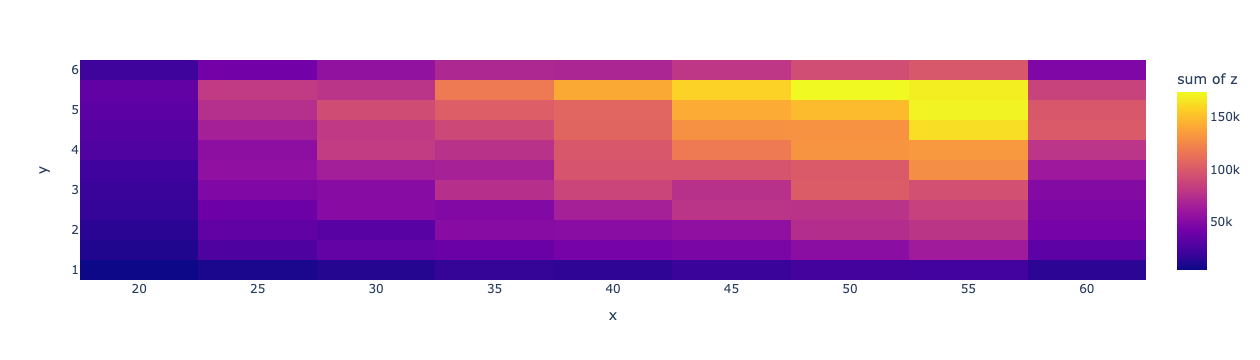

In [54]:
px.density_heatmap(x = X1, y = X2, z = Y)

In [55]:
exp_var = np.array([X1, X2]).T
dep_var = Y

In [56]:
# def _split_center(exp_vector, dep_var, value):
#     """Parameter
#     ===========
#     X: explain vector (N vector)
#     y: dependent variable (N vector)

#     Return
#     ======
#     Total Variance for Split
#     """
#     split_upper = dep_var[exp_vector >= value]
#     split_lower = dep_var[exp_vector <= value]

#     return np.var(split_upper) * len(split_upper) + np.var(split_lower) * len(
#         split_lower
#     )

# index = 0

# exp_vector = exp_var.T[index]

# split = np.vectorize(lambda x: _split_center(exp_vector, dep_var, x))
# split_variance = split(exp_vector)
# min_variance_cand = exp_vector[split_variance.argmin()]

# min_variance_cand

In [74]:
tree = RegressionDecisionRandomTree(max_depth = 7)

In [75]:
tree = tree.fit(exp_var[:10000], dep_var[:10000])

1 0 40.244678135328385
2 1 3.1813808176958274
2 1 3.589659407175844
3 0 29.82098362729719
3 0 30.4210482006807
3 0 50.499966598855885
3 0 49.51136820695325
4 1 2.0738038259431306
4 1 2.133446577993209
4 1 4.5165533837950145
4 1 4.504119475997376
4 1 2.211739283406372
4 1 2.3430770411477804
4 1 4.748461837272173
4 1 4.644827247395096
5 0 23.538040863098306
5 0 25.053937767141022
5 0 33.97552732985066
5 0 34.84066266754159
5 0 26.082578482497567
5 0 24.900869050375178
5 0 36.6208399953687
5 0 34.75403394755372
5 0 45.067386555311614
5 0 45.94438520273684
5 0 57.54887453749116
5 0 55.3819957693769
5 0 45.1269843669613
5 0 45.751677079979856
5 0 54.35098351629186
5 0 55.51845361542127
6 1 1.509426188124501
6 1 1.4688071928050996
6 1 2.6812107315757725
6 1 2.6776900281732434
6 1 1.5336384714412428
6 1 1.6227653915128495
6 1 2.6170067593594113
6 1 2.593231124057845
6 1 3.866862456783153
6 1 3.9197428628399704
6 1 5.292668459546256
6 1 5.3616822727291735
6 1 3.7759347188422328
6 1 3.769472888

In [76]:
dep_var_predict = tree.predict(exp_var[10000:])

In [77]:
data = np.column_stack([X1[10000:], X2[10000:], dep_var[10000:], dep_var_predict])

In [78]:
import pandas as pd
data = pd.DataFrame(data)

In [79]:
data.columns = ['x1', 'x2', 'y', 'y_p']

In [80]:
data['x1'] = data['x1'] // 10
data['x2'] = data['x2'] // 1

In [81]:
data = data.groupby(['x1', 'x2'])[['y', 'y_p']].mean().reset_index()

In [82]:
data

,x1,x2,y,y_p
0,2.0,1.0,140.908294,141.505609
1,2.0,2.0,216.241445,215.018743
2,2.0,3.0,290.986405,296.507840
3,2.0,4.0,371.106247,375.067626
4,2.0,5.0,440.490147,435.107483
5,3.0,1.0,191.084085,197.809263
6,3.0,2.0,304.544282,304.550904
7,3.0,3.0,409.884878,411.558811
8,3.0,4.0,512.776816,514.992216
9,3.0,5.0,624.776204,615.331860


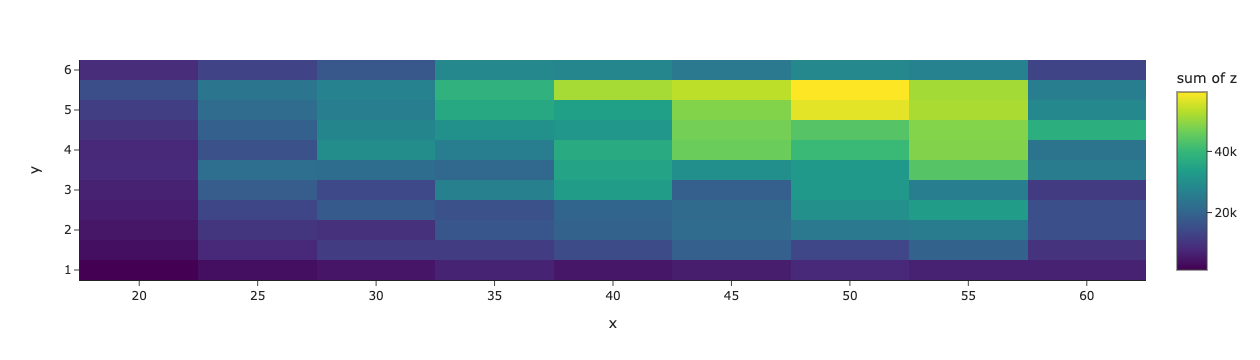

In [83]:
px.density_heatmap(x = X1[10000:], y = X2[10000:], z = Y[10000:], template = 'simple_white')

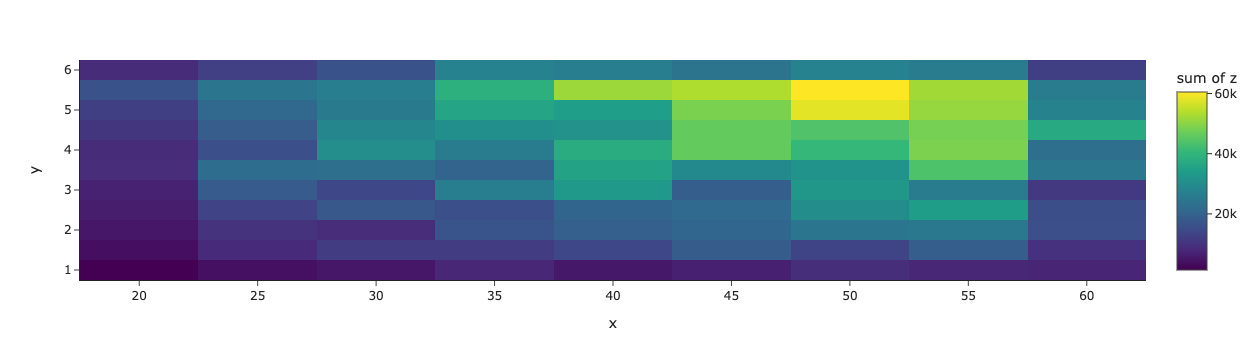

In [84]:
px.density_heatmap(x = X1[10000:], y = X2[10000:], z = dep_var_predict, template = 'simple_white')

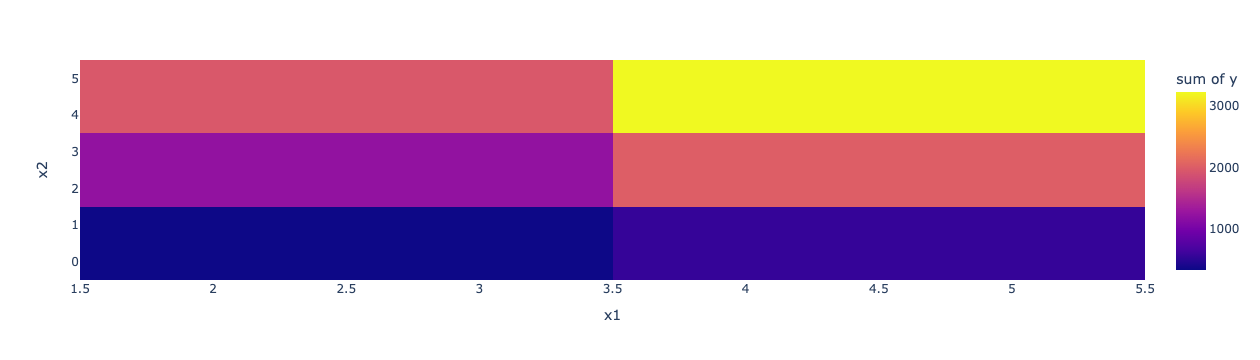

In [85]:
px.density_heatmap(data_frame = data, x = 'x1', y = 'x2', z = 'y')

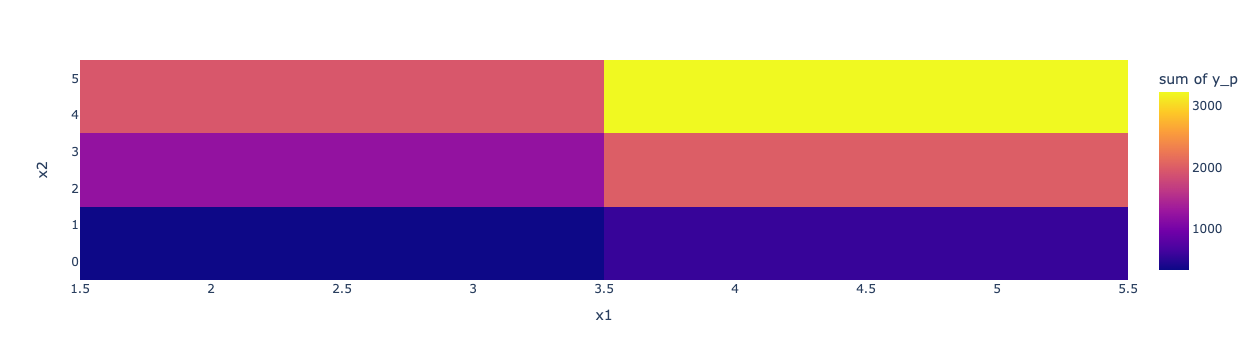

In [86]:
px.density_heatmap(data_frame = data, x = 'x1', y = 'x2', z = 'y_p')